In [1]:
import datajoint as dj
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'
dj.conn().connect()

Please enter DataJoint username: thinh
Please enter DataJoint password: ········
Connecting thinh@mesoscale-activity.datajoint.io:3306


In [2]:
%matplotlib inline
import os
os.chdir('..')

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking
from pipeline.plot import behavior_plot

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
experiment.Session & ephys.Unit

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
412330,15,2018-07-16,daveliu,RRig
412753,41,2018-07-10,daveliu,RRig
413950,20,2018-10-22,daveliu,RRig
413950,21,2018-10-23,daveliu,RRig
432570,13,2018-10-22,daveliu,RRig
432572,9,2018-11-20,daveliu,RRig
432572,10,2018-11-21,daveliu,RRig
432572,14,2018-11-25,daveliu,RRig
432572,15,2018-11-26,daveliu,RRig
432998,16,2019-01-13,daveliu,RRig


In [6]:
session_key = (experiment.Session & {'subject_id': 432572, 'session': 15}).fetch1('KEY')

In [7]:
session_key

{'subject_id': 432572, 'session': 15}

# Plot proportional 'correct' for one session

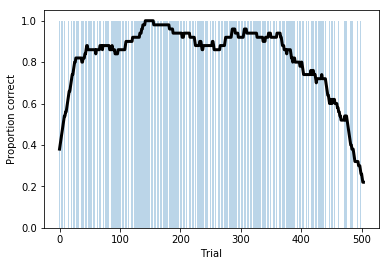

In [8]:
behavior_plot.plot_correct_proportion(session_key)

# Plot proportional 'correct' for one session, modulated by photostim

In [9]:
photostims = experiment.Photostim * experiment.BrainLocation

In [10]:
left_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="left"' & session_key).fetch1('KEY')
right_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="right"' & session_key).fetch1('KEY')
bi_alm_photostim = (photostims & 'brain_area="ALM"' & 'hemisphere="both"' & session_key).fetch1('KEY')

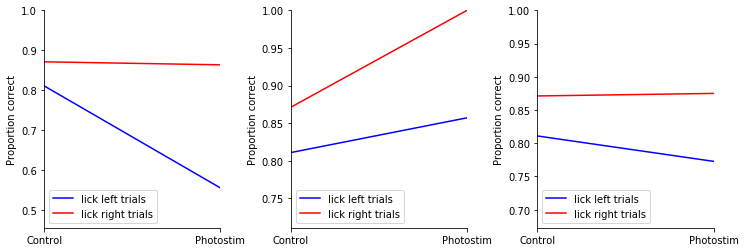

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)
behavior_plot.plot_photostim_effect(session_key, left_alm_photostim, axis=axs[0])
behavior_plot.plot_photostim_effect(session_key, right_alm_photostim, axis=axs[1])
behavior_plot.plot_photostim_effect(session_key, bi_alm_photostim, axis=axs[2])

# Plot movement tracking with spiking overlay

In [12]:
units = (ephys.Unit & session_key & 'unit_quality = "good"').fetch('KEY')

In [13]:
unit_key = units[2]

IndexError: index 0 is out of bounds for axis 0 with size 0

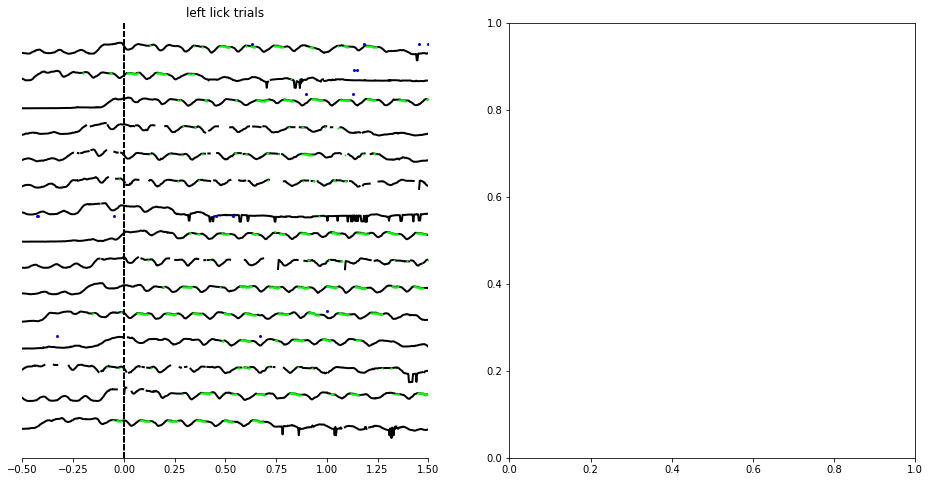

In [14]:
behavior_plot.plot_jaw_movement(session_key, unit_key, trial_limit=15)

# Plot single-trial jaw movement

In [15]:
tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.TrialEvent

subject_id institution 6 digit animal ID,session session number,trial trial number,tracking_device device type/function,"tracking_samples number of events (possibly frame number, relative to the start of the trial)",task task type,task_protocol task protocol,trial_instruction,early_lick,outcome
432572,15,15,Camera 0,2022,audio delay,1,right,no early,hit
432572,15,16,Camera 0,2006,audio delay,1,left,no early,miss
432572,15,17,Camera 0,1880,audio delay,1,right,no early,hit
432572,15,18,Camera 0,2053,audio delay,1,left,no early,miss
432572,15,19,Camera 0,1836,audio delay,1,right,no early,miss
432572,15,20,Camera 0,1889,audio delay,1,left,no early,hit
432572,15,21,Camera 0,2031,audio delay,1,left,no early,hit
432572,15,22,Camera 0,2014,audio delay,1,left,no early,hit
432572,15,23,Camera 0,1979,audio delay,1,left,no early,hit
432572,15,24,Camera 0,2057,audio delay,1,left,no early,hit


In [16]:
trials = (tracking.Tracking * experiment.BehaviorTrial & session_key & experiment.TrialEvent).fetch('KEY')

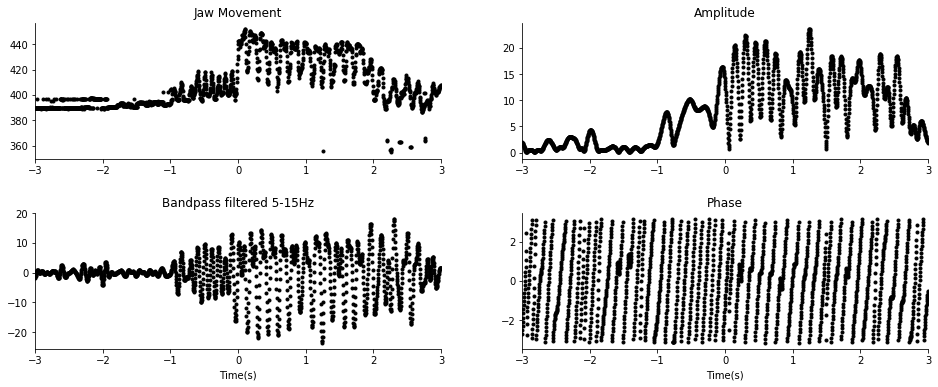

In [22]:
behavior_plot.plot_trial_jaw_movement(trials[3]);

# Plot sliding-window phase distribution of jaw movement

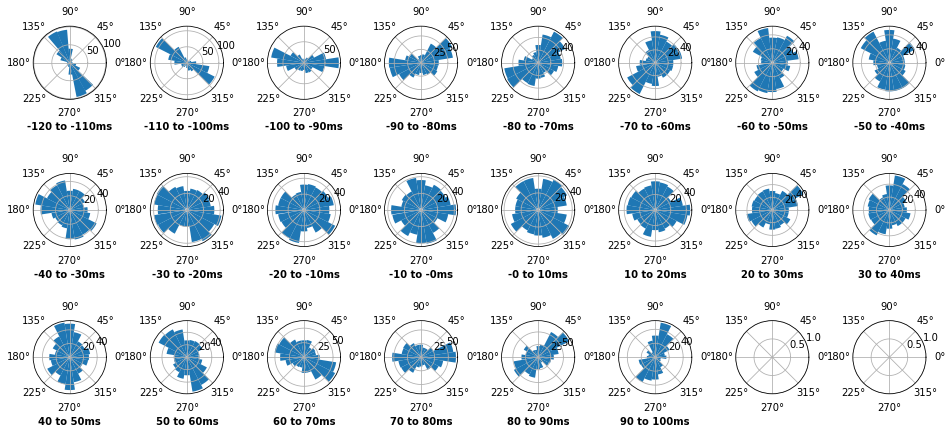

In [60]:
behavior_plot.plot_windowed_jaw_phase_dist(session_key, xlim=(-0.12, 0.1), w_size=0.01, bin_counts=20)

# Plot all phase distribution of jaw movement

In [ ]:
behavior_plot.plot_jaw_phase_dist(session_key, xlim=(-0.12, 0.3), bin_counts=20)

# =============================================

In [59]:
import importlib
importlib.reload(behavior_plot)

<module 'pipeline.plot.behavior_plot' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\MAP\\map-ephys\\pipeline\\plot\\behavior_plot.py'>